Project : Analyize the Unemployement during COVID-19 in India.

Objective of Analysis: The primary aim of this analysis is to assess the repercussions of the COVID-19 pandemic on India's job market. The dataset under consideration contains crucial information about the unemployment rates across various Indian states. The dataset encompasses key indicators such as States, Date, Measuring Frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, and Estimated Labour Participation Rate (%).

Dataset Details:

The dataset provides insights into the unemployment scenario across different Indian states:

States: The states within India. Date: The date when the unemployment rate was recorded. Measuring Frequency: The frequency at which measurements were taken (Monthly). Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India. Estimated Employed Individuals: The count of people currently employed. Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.

This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country. The analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.

Dataset link : https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india/data

Author : Aditya Raj Sisodiya
Linkedin : https://www.linkedin.com/in/adityarajsisodiya/

In [1]:
#importing  nessesary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import calendar
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset from csv file
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv",skipinitialspace=True)

In [3]:
#print first 5 records of the dataset
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
#shape of the dataset
rows,columns=df.shape
print("dataset containts total {} of rows and {} columns.".format(rows,columns))

dataset containts total 267 of rows and 9 columns.


In [5]:
#print concise summary about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
#renaming column names
old_col_names=df.columns
new_col_names=['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate',
       'region', 'longitude', 'latitude']
df.rename(columns=dict(zip(old_col_names,new_col_names)),inplace=True)

In [7]:
#check column name changes
df.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [8]:
#check for missing values
df.isnull().sum()

state                                  0
date                                   0
frequency                              0
estimated unemployment rate            0
estimated employed                     0
estimated labour participation rate    0
region                                 0
longitude                              0
latitude                               0
dtype: int64

In [9]:
#check for duplicate records
df.duplicated().sum()

0

Data Type Correction

In [10]:
#converting Date column to Datetime format.
df["date"]=pd.to_datetime(df.date)

In [11]:
#extract integer month and month name from the date column
df['month_int']=df['date'].dt.month
df["month"]=df["month_int"].apply(lambda x: calendar.month_abbr[x])

In [12]:
df.tail()

,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,22.9868,87.855,9,Sep
266,West Bengal,2020-10-31,M,9.98,33962549,45.63,East,22.9868,87.855,10,Oct


Exploratory Data Analysis

In [13]:
#print the descriptive summary of estimated unemployment rate,estimated employed and estimated labour participation rate.
np.round(df[[col for col in df.columns if col.startswith("estimated")]].describe().T,decimals=2)

,count,mean,std,min,25%,50%,75%,max
estimated unemployment rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
estimated employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
estimated labour participation rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [14]:
#print regionwise statistical summary of estimated unemployment rate,estimated employed and estimated labour participation rate.
np.round(df.groupby(["region"])[['estimated unemployment rate', 'estimated employed',
                                       'estimated labour participation rate']].mean().reset_index(),decimals=2)

,region,estimated unemployment rate,estimated employed,estimated labour participation rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


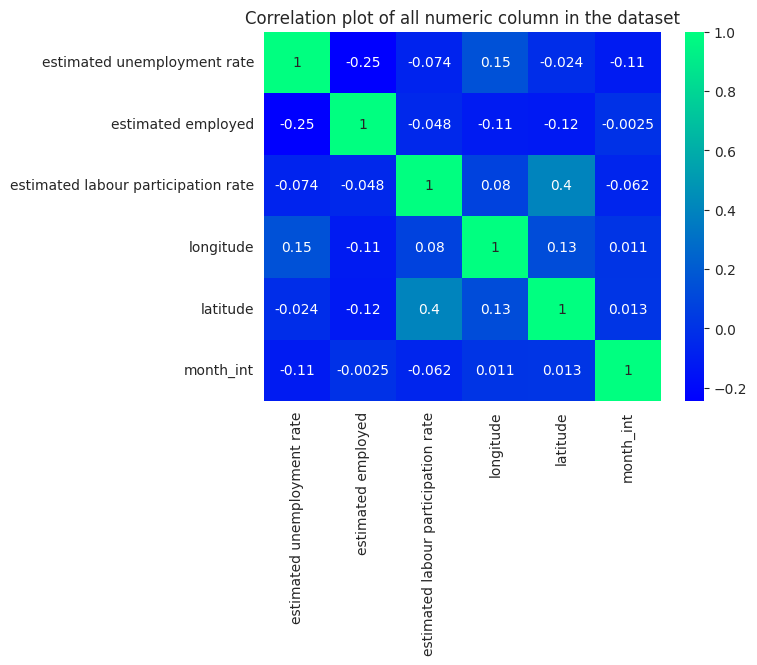

In [15]:
#visualize the correlation plot of numeric columns
sns.heatmap(df[df.select_dtypes(include=[int,float]).columns].corr(),annot=True,cmap="winter")
plt.title("Correlation plot of all numeric column in the dataset")
plt.show()

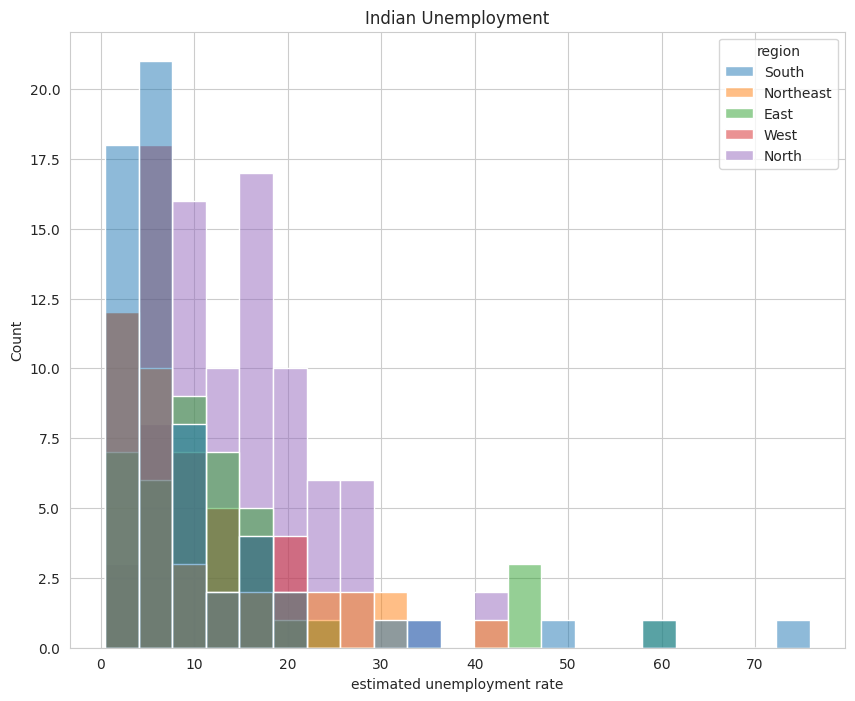

In [16]:
#visualize the unemployment rate of india by regionewise
plt.figure(figsize=(10, 8))
plt.title("Indian Unemployment")
sns.histplot(x="estimated unemployment rate", hue="region", data=df)
plt.show()

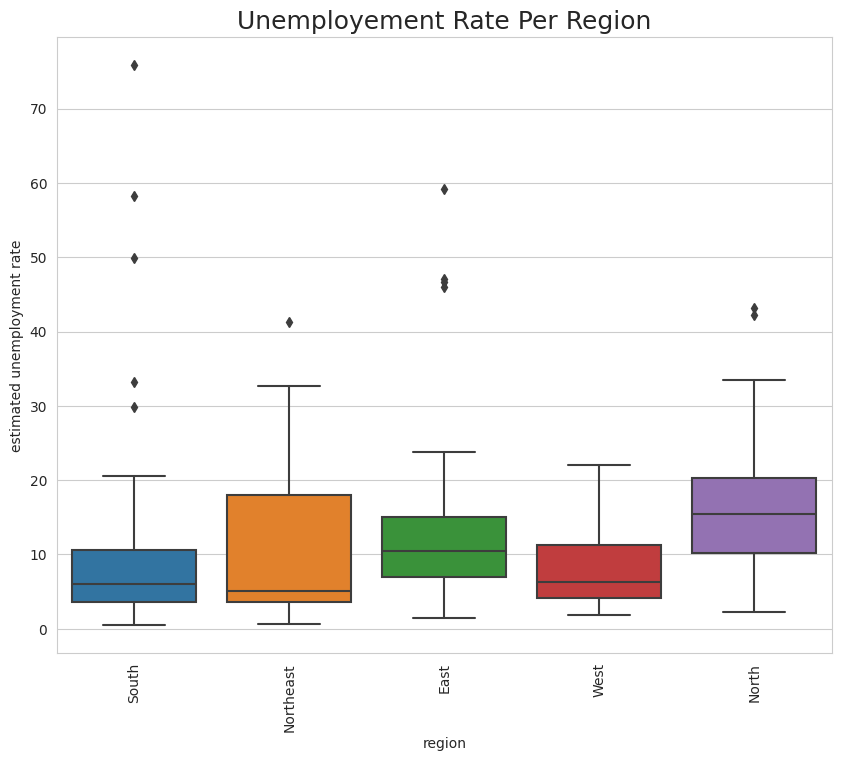

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="region",y="estimated unemployment rate",data=df)
plt.xticks(rotation=90)
plt.title("Unemployement Rate Per Region",size=18)
plt.show()

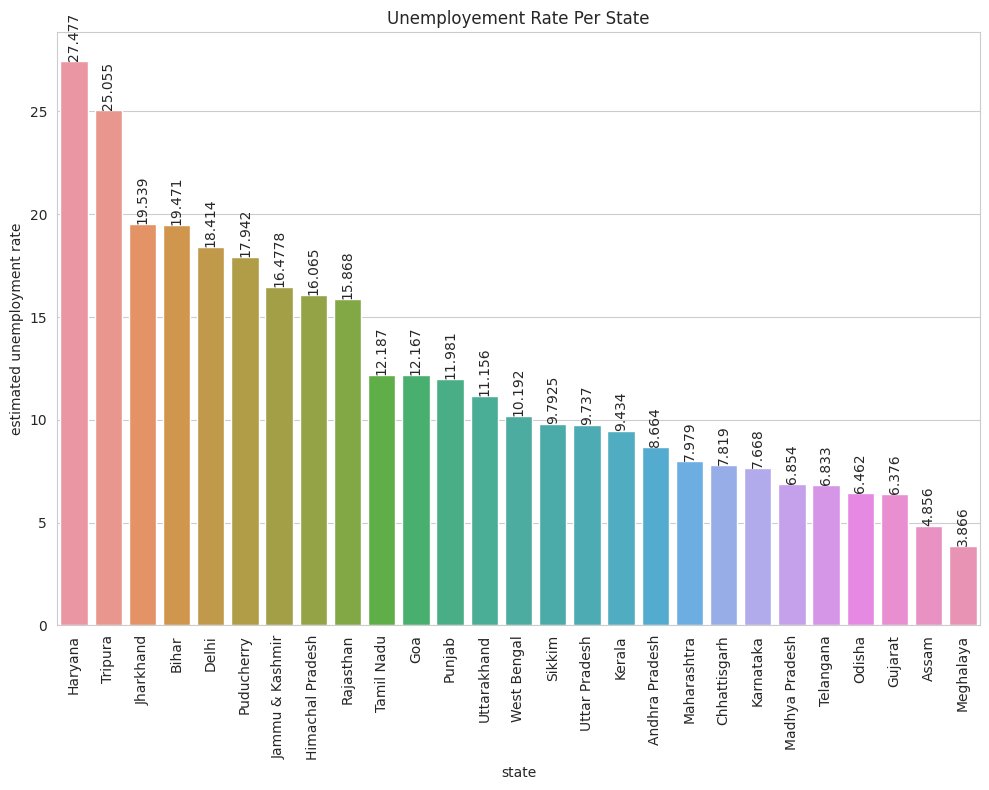

In [18]:
# visualize the unemployement rate statewise
gb_states=df.groupby(["state"]).mean().reset_index()
gb_states=gb_states.sort_values("estimated unemployment rate",ascending=False)
plt.figure(figsize=(10,8))
ax=sns.barplot(x="state",y="estimated unemployment rate",data=gb_states)
for bar in ax.containers:
  plt.bar_label(bar,rotation=90)
plt.xticks(rotation=90)
plt.title("Unemployement Rate Per State")
plt.tight_layout()
plt.show()

In [19]:
# Create an animated bar chart of unemployment rates by region and month

fig = px.bar(df, x='region', y='estimated unemployment rate', animation_frame='month', color='state',
             title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700, template='plotly')
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

In [20]:
#visualize unemployment rates by region and state

unemplo_df = df[['state', 'region', 'estimated unemployment rate', 'estimated employed', 'estimated labour participation rate']]
unemplo = unemplo_df.groupby(['region', 'state'])['estimated unemployment rate'].mean().reset_index()
fig = px.sunburst(unemplo, path=['region', 'state'], values='estimated unemployment rate',
                  color_continuous_scale='Plasma', title='Unemployment rate in each region and state',
                  height=650, template='ggplot2')
fig.show()

Impact of lockdown on states Estimated Employed

In [21]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="region",
                     hover_name="state", size="estimated unemployment rate",
                     animation_frame="month",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF",
    showocean=True)

fig.show()